In [56]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from selenium import webdriver
import time
from matplotlib import pyplot as plt

# code=input("검색하고 싶은 주식 코드를 입력해주세요\n")
driver=webdriver.Chrome('C:\pydata\chromedriver.exe')
url='https://finance.naver.com/item/sise.naver?code=005930'
driver.get(url)
time.sleep(2)
html=driver.page_source
soup=bs(html, 'html.parser')
soup=soup.find('div', class_='section inner_sub')
soup_url=soup.find_all('iframe')[1]['src']
df=pd.DataFrame()

newurl='https://finance.naver.com'+soup_url
driver.get(newurl)
time.sleep(2)
html=driver.page_source
soup=bs(html, 'html.parser')
table=soup.find("tbody")

columns=[]  # dataframe의 열 제목 얻는 코드
for data in table.find_all("th"):
    columns.append(data.text)

for i in range(1,11):
    newurl='https://finance.naver.com'+soup_url+"&page="+str(i)
    driver.get(newurl)
    time.sleep(2)
    html=driver.page_source
    soup=bs(html, 'html.parser')
    table=soup.find("tbody")
    columns=[]
    for data in table.find_all("th"):
        columns.append(data.text)

    data=table.find_all("tr", onmouseover="mouseOver(this)")

    fulldata=[]
    row=[]

    for sub in data:    
        for i in sub.find_all("span"):
            row.append(i.text.replace("\n",""))
        fulldata.append(row)
        row=[]
    tmp_df=pd.DataFrame(fulldata)
    df=pd.concat([df,tmp_df])
df.columns=columns

display(df)

C:\Users\jhgf\AppData\Local\Temp\ipykernel_16404\608893797.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('C:\pydata\chromedriver.exe')


,날짜,종가,전일비,시가,고가,저가,거래량
0,2022.03.25,"69,800",0,"70,100","70,200","69,600","12,907,613"
1,2022.03.24,"69,800",\t\t\t\t700\t\t\t\t,"69,600","70,300","69,600","37,943,357"
2,2022.03.23,"70,500",\t\t\t\t200\t\t\t\t,"70,600","71,200","70,300","12,398,025"
3,2022.03.22,"70,300",\t\t\t\t400\t\t\t\t,"69,900","70,500","69,900","9,402,666"
4,2022.03.21,"69,900",\t\t\t\t800\t\t\t\t,"70,900","71,000","69,900","11,169,002"
...,...,...,...,...,...,...,...
5,2021.11.04,"70,600",\t\t\t\t200\t\t\t\t,"71,200","71,600","70,500","11,818,987"
6,2021.11.03,"70,400","\t\t\t\t1,100\t\t\t\t","71,700","71,700","70,100","12,770,428"
7,2021.11.02,"71,500","\t\t\t\t1,600\t\t\t\t","70,800","72,200","70,700","16,812,570"
8,2021.11.01,"69,900",\t\t\t\t100\t\t\t\t,"70,200","70,600","69,900","11,503,729"


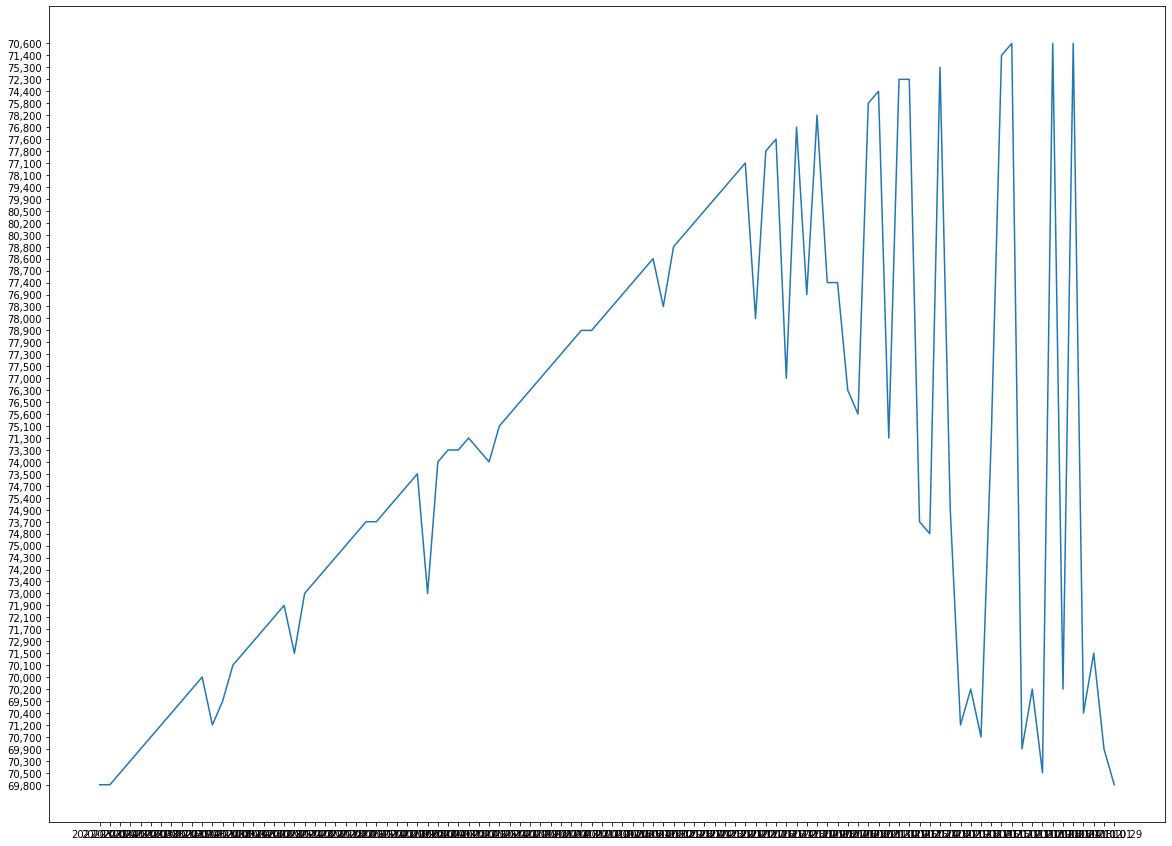

In [57]:
plt.figure(figsize=(20,15))
plt.plot(df["날짜"], df["종가"])
